<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN<Title>
</div>

<h2 style="text-align:center;">Nhóm 23</h2>

## Thông tin nhóm: 

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>

## Giảng viên hướng dẫn:
**Thầy Lê Nhựt Nam**

### Chủ đề: **Phân tích và trực quan giá cổ phiếu của top 6 ngân hàng có giá trị thương hiệu tốt nhất Việt Nam**

## **Phần B: Khám phá và tiền xử lý dữ liệu.**

### **I. Chuẩn bị**

#### 1. Nhập các thư viện

In [32]:
# Nhập các thư viện cần dùng
import numpy as np
import pandas as pd
import warnings

# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp

#### 2. Nhập các file dữ liệu vào notebook

Vì dữ liệu được lưu trữ theo từng ngân hàng riêng biệt, nên ta sẽ đọc từng file lại, tiền xử lý và sau đó gộp lại 1 file sau cùng.

In [13]:
path = "./Data/"
stock_symbol = ['VCB','BID','CTG','TCB','AGR','VPB']
df =[]
for bank in stock_symbol:
    raw_df = pd.read_csv(path + bank +' Historical Data.csv')
    df.append(raw_df)

VCB_df = df[0]
BID_df = df[1]
CTG_df = df[2]
TCB_df = df[3]
AGR_df = df[4]
VPB_df = df[5]

In [14]:
# Thêm cột "Stock symbol" với giá trị là Mã cổ phiếu tương ứng của ngân hàng
VCB_df['Stock symbol'] = 'VCB'
BID_df['Stock symbol'] = 'BID'
CTG_df['Stock symbol'] = 'CTG'
TCB_df['Stock symbol'] = 'TCB'
AGR_df['Stock symbol'] = 'AGR'
VPB_df['Stock symbol'] = 'VPB'

# Thêm cột "Bank" với giá trị tên ngân hàng tương ứng
VCB_df['Bank'] = 'Vietcombank'
BID_df['Bank'] = 'BIDV'
CTG_df['Bank'] = 'VietinBank'
TCB_df['Bank'] = 'Techcombank'
AGR_df['Bank'] = 'Agribank'
VPB_df['Bank'] = 'VPBank'

# Gộp tất cả các DataFrame vào một DataFrame duy nhất
full_df = pd.concat([VCB_df, BID_df, CTG_df, TCB_df, AGR_df], ignore_index=True)

# Hiển thị DataFrame kết quả
full_df

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
0,05/24/2024,"90,200","91,000","91,000","90,000",2.24M,-0.88%,VCB,Vietcombank
1,05/23/2024,"91,000","90,700","91,500","90,500",1.32M,0.33%,VCB,Vietcombank
2,05/22/2024,"90,700","91,500","91,700","90,700",1.35M,-0.44%,VCB,Vietcombank
3,05/21/2024,"91,100","91,900","92,000","90,700",1.49M,-0.87%,VCB,Vietcombank
4,05/20/2024,"91,900","92,300","93,000","91,800",1.04M,0.11%,VCB,Vietcombank
...,...,...,...,...,...,...,...,...,...
15086,12/17/2009,"12,328.8","11,468.6","12,500.8","11,468.6",491.68K,2.38%,AGR,Agribank
15087,12/16/2009,"12,042.1","12,042.1","12,042.1","12,042.1",94.66K,-4.98%,AGR,Agribank
15088,12/15/2009,"12,672.8","12,844.9","13,303.6","12,672.8",196.63K,-4.74%,AGR,Agribank
15089,12/14/2009,"13,303.6","13,303.6","14,278.5","13,303.6",505.37K,-4.92%,AGR,Agribank


### **II. Khám phá dữ liệu**

#### 1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [15]:
full_df.sample(7)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
11250,05/21/2019,"24,050.0","23,850.0","24,300.0","23,850.0",3.22M,0.84%,TCB,Techcombank
3067,02/08/2012,"10,367","9,961","10,367","9,961",1.59M,4.08%,VCB,Vietcombank
479,06/22/2022,"64,352","65,961","66,046","63,506",1.26M,-2.19%,VCB,Vietcombank
4189,07/04/2022,"31,103.0","31,502.0","31,724.0","30,970.0",2.06M,0.00%,BID,BIDV
15046,02/12/2010,"12,844.9","12,386.1","12,902.2","12,386.1",90.18K,3.70%,AGR,Agribank
6833,03/21/2022,"32,850.0","32,800.0","32,950.0","32,550.0",3.45M,0.15%,CTG,VietinBank
12216,06/24/2021,"13,237.9","13,287.1","13,484.0","13,090.3",1.40M,0.00%,AGR,Agribank


Ta thấy, mỗi dòng dữ liệu đều thể hiện thông tin về giá chứng khoán của ngân hàng trong một ngày cụ thể. Không có sự khác biệt trong ý nghĩa của các dòng.
Tuy nhiên, cần xem xét thêm có sự trùng lặp nào ở các dòng hay không.

In [16]:
if len(full_df[full_df.duplicated()]) == 0:
    print(f'Không có dòng nào trùng lặp trong dữ liệu.')
else:
    print('Tồn tại dòng bị trùng lặp trong dữ liệu.')

Không có dòng nào trùng lặp trong dữ liệu.


#### 2. Mỗi cột có ý nghĩa gì?

Các cột và thông tin tương ứng:
- `Date`: Ngày ghi nhận thông tin (đóng vai trò là index khi nằm ở các dataframe của từng ngân hàng).

- `Price`: Giá tham chiếu của ngày đang đề cập, tạm xem như giá đóng cửa (Close price - giá trung bình của các lệnh khớp trong 15p cuối phiên, thường là 14h30-14h45p).

- `Open`: Giá phiên khớp lệnh mở cửa (Được ghi nhận sau phiên khớp lệnh đầu ngày từ 9h00 - 9h15 các ngày thứ 2 đến thứ 6).

- `High`: Giá cao nhất trong phiên giao dịch của ngày đang đề cập.

- `Low`: Giá thấp nhất trong phiên giao dịch của ngày đang đề cập.

- `Vol.`: Khối lượng giao dịch - Tổng số cổ phiếu được mua và bán trong một phiên giao dịch

- `Change %`: Biến động giá - sự thay đổi giá cổ phiếu so với giá tham chiếu (trong ngữ cảnh này thể hiện sự thay đổi của Price ngày hiện tại so với price ngày liền trước.)

#### 3. Mỗi cột hiện có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp cần xử lý tiếp hay không?

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15091 entries, 0 to 15090
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          15091 non-null  object
 1   Price         15091 non-null  object
 2   Open          15091 non-null  object
 3   High          15091 non-null  object
 4   Low           15091 non-null  object
 5   Vol.          15091 non-null  object
 6   Change %      15091 non-null  object
 7   Stock symbol  15091 non-null  object
 8   Bank          15091 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


Ta thấy toàn bộ các cột đều thuộc kiểu object. Trong khi dựa trên định nghĩa (loại trừ cột Stock symbol và Bank), chúng phải thuộc kiểu số (hoặc kiểu datetime nếu là cột Date). Vậy nên ta cần tiền xử lý một chút tại đây. Trước hết, ta in ngẫu nhiên 1 dòng ra để xem xét:

In [18]:
full_df.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
9808,04/15/2010,"8,255.2","8,255.2","8,284.2","8,255.2",269.44K,0.35%,CTG,VietinBank
11600,12/07/2023,"16,350.0","16,850.0","16,900.0","15,750.0",5.08M,-2.68%,AGR,Agribank
544,03/18/2022,"84,200","83,100","85,200","82,900",1.41M,1.45%,VCB,Vietcombank
2040,03/24/2016,"22,684","23,115","23,169","22,630",1.42M,-1.86%,VCB,Vietcombank
10630,11/04/2021,"53,300.0","53,700.0","54,200.0","52,800.0",18.68M,-0.74%,TCB,Techcombank


Ta thấy, lý do các cột đều đang ở dạng object có thể là vì chúng tồn tại các ký tự đặc biệt trong giá trị. Cụ thể
- Các cột `Price, Open, High, Low` tồn tại dấu "," => Ta xoá dấu này đi và chuyển sang float.
- Cột `Vol.` có ký tự cuối cùng là "M" hoặc "K" để thể hiện đơn vị, với M là tương ứng với triệu và K ứng với nghìn. => ta sẽ chuyển đổi thành số tương ứng.
- Cột `Change %` còn tồn tại "%" => Xoá % và chuyển về float.


In [19]:
# Hàm để chuyển đổi giá trị trong cột "Vol."
def convert_volume(vol_str):
    if vol_str.endswith('M'):
        return float(vol_str[:-1]) * 1000000
    elif vol_str.endswith('K'):
        return float(vol_str[:-1]) * 1000
    else:
        return float(vol_str)

def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # Loại bỏ dấu phẩy từ cột Price, Open, High, Low
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)

    # Loại bỏ dấu % từ cột 'Change %'
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

    # Sửa cột "Vol" trong DataFrame
    df['Vol.'] = df['Vol.'].apply(convert_volume)

    # Sắp xếp cột 'Date' theo thứ tự tăng dần
    df = df.sort_values(by='Date')

    return df

In [20]:
# Áp dụng tiền xử lý cho data đã hợp nhất
full_df = preprocessing(full_df)

# Áp dụng tiền xử lý cho từng ngân hàng - Phòng hờ cần sử dụng về sau.
VCB_df = preprocessing(VCB_df)
BID_df = preprocessing(BID_df)
CTG_df = preprocessing(CTG_df)
TCB_df = preprocessing(TCB_df)
AGR_df = preprocessing(AGR_df)
VPB_df = preprocessing(VPB_df)

# Xem vài dòng của full_df sau xử lý
full_df.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
7054,2021-05-04,32519.8,30288.8,32519.8,30288.8,32800000.0,5.39,CTG,VietinBank
9756,2010-07-01,7528.5,7702.9,7702.9,7528.5,240240.0,-1.89,CTG,VietinBank
8828,2014-03-24,10871.2,10687.0,10871.2,10687.0,3140000.0,2.31,CTG,VietinBank
9011,2013-06-27,10654.3,10548.3,10813.4,10442.3,4950000.0,2.55,CTG,VietinBank
10940,2020-08-11,19450.0,19550.0,19550.0,19300.0,1330000.0,0.26,TCB,Techcombank


Xem lại kiểu dữ liệu của từng cột sau khi xử lý.

In [21]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15091 entries, 3717 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15091 non-null  datetime64[ns]
 1   Price         15091 non-null  float64       
 2   Open          15091 non-null  float64       
 3   High          15091 non-null  float64       
 4   Low           15091 non-null  float64       
 5   Vol.          15091 non-null  float64       
 6   Change %      15091 non-null  float64       
 7   Stock symbol  15091 non-null  object        
 8   Bank          15091 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.2+ MB


> Ngoài ra, để đảm bảo so sánh công bằng cho các ngân hàng, nhóm sẽ lấy dữ liệu ở cùng 1 khoảng thời gian (tại đây nhóm chọn khoảng thời gian mà tất cả các ngân hàng đều có dữ liệu). Do Techcombank lên sàn muộn nhất, nên nhóm sẽ lấy từ thời gian lên sàn của ngân hàng này trở về sau (tức sau ngày 4/6/2018).

In [22]:
# Loại bỏ các dòng từ ngày 4/6/2018 trở về trước
full_df = full_df[full_df['Date'] >= pd.Timestamp(2018, 6, 4)]
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7469 entries, 1493 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7469 non-null   datetime64[ns]
 1   Price         7469 non-null   float64       
 2   Open          7469 non-null   float64       
 3   High          7469 non-null   float64       
 4   Low           7469 non-null   float64       
 5   Vol.          7469 non-null   float64       
 6   Change %      7469 non-null   float64       
 7   Stock symbol  7469 non-null   object        
 8   Bank          7469 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 583.5+ KB


#### 4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

##### 4.1. Các cột dạng số

In [23]:
numerical_columns = full_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)
full_df.describe()

Numerical columns: Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


,Date,Price,Open,High,Low,Vol.,Change %
count,7469,7469.000000,7469.000000,7469.000000,7469.000000,7.469000e+03,7469.000000
mean,2021-05-26 04:11:59.132414208,33708.594993,33706.631758,34153.948869,33271.324167,3.881245e+06,0.081259
min,2018-06-04 00:00:00,2165.300000,2214.500000,2303.100000,2145.600000,8.500000e+03,-14.920000
25%,2019-11-26 00:00:00,18639.800000,18591.600000,19000.000000,18192.400000,1.040000e+06,-0.990000
50%,2021-05-28 00:00:00,29100.000000,29100.000000,29418.000000,28700.000000,2.030000e+06,0.000000
75%,2022-11-21 00:00:00,42837.000000,42837.000000,43400.000000,42236.000000,4.460000e+06,1.170000
max,2024-05-24 00:00:00,97400.000000,98500.000000,100500.000000,97300.000000,5.824000e+07,7.000000
std,NaN,21778.855525,21767.805290,21981.870103,21548.591015,5.053638e+06,2.300357


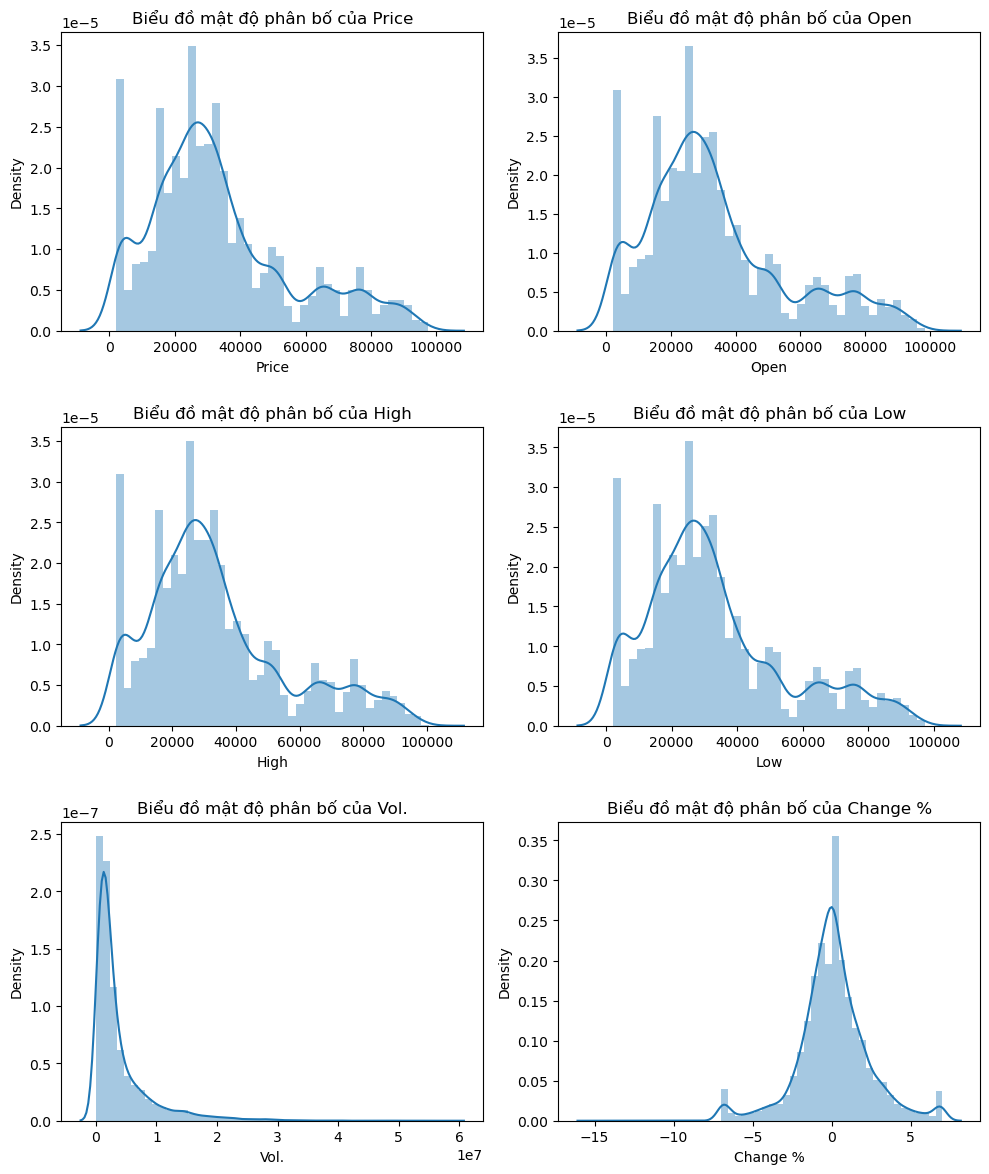

In [59]:
plt.figure(figsize=(10 , 12))
count = 1
for col in numerical_columns:
    ax = plt.subplot(3, 2, count)
    sns.distplot(full_df[col])
    ax.set_title(f"Biểu đồ mật độ phân bố của "{col}"")
    count+=1
plt.tight_layout()
plt.show()

In [57]:

figure1 = px.box(full_df["Price"])
figure2 = px.box(full_df["Open"])
figure3 = px.box(full_df["High"])
figure4 = px.box(full_df["Low"])
figure5 = px.box(full_df["Vol."])
figure6 = px.box(full_df["Change %"])

figures = [figure1, figure2, figure3, figure4,figure5,figure6]
 
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []
figure5_traces = []
figure6_traces = []

figure_traces = [figure1_traces,figure2_traces,figure3_traces,figure4_traces,figure5_traces,figure6_traces]

for (figure, figure_trace) in zip(figures,figure_traces):
    for trace in range(len(figure["data"])):
        figure_trace.append(figure["data"][trace])

# Create a 1x2 subplot
this_figure = sp.make_subplots(rows = 2, cols = 3)
this_figure.update_layout(height = 700, width = 1000, title_text = "Boxplot cho từng cột dạng số", title_font_size = 25)
row = 1
count = 1
# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for figure_trace in figure_traces:
    for traces in figure_trace:
        this_figure.append_trace(traces, row = row, col = count)
    count += 1
    if count >3:
        row = 2 
        count =1
this_figure.show()

In [35]:
# I largely keep the codes and comments the same as the original answer, with the modification highlighted under '#######'


my_df = px.data.medals_long()

# Create figures in Express
figure1 = px.bar(my_df, x = "nation", y = "count", color = "medal")
figure2 = px.line(my_df, x = "nation", y = "count", color = "medal")

# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into its traces
figure1_traces = []
figure2_traces = []
for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    ############ The major modification. Manually set 'showlegend' attribute to False. ############
    figure2["data"][trace]['showlegend'] = False
    figure2_traces.append(figure2["data"][trace])

# Create a 1x2 subplot
this_figure = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ['Bar', 'Line'])
this_figure.update_layout(height = 500, width = 1200, title_text = "Medals count by country", title_font_size = 25)

# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for traces in figure1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row = 1, col = 2)
this_figure.show()

##### 4.2. Các cột dạng phân loại

#### 5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm cần phải xử lý như thế nào?


In [15]:
full_df.to_csv("./Data/full_data.csv", index=False)

In [16]:
VCB_df.to_csv("./Data/VCB_data.csv", index=False)
BID_df.to_csv("./Data/BID_data.csv", index=False)
CTG_df.to_csv("./Data/CTG_data.csv", index=False)
TCB_df.to_csv("./Data/TCB_data.csv", index=False)
AGR_df.to_csv("./Data/AGR_data.csv", index=False)
VPB_df.to_csv("./Data/VPB_data.csv", index=False)

: 